In [2]:
# Import necassary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load dataset
df_prices = pd.read_csv('/Users/lukeblecha/neuefische-traum/datasets/prices_20210707.csv')

# EDA for Prices Dataset

Initial look at data and data cleaning

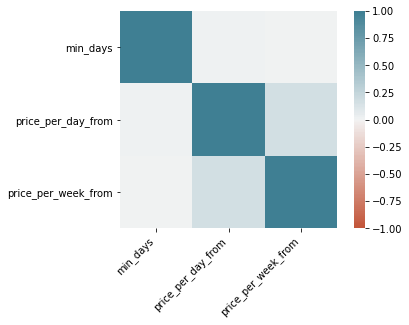

In [4]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap
corr = df_prices.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');